<font color=black size=5 face=雅黑>**主成分分析PCA**</font>

1. 主要用于数据的降纬
2. 数据可视化
3. 去噪


<font color=black size=5 face=雅黑>**scikit-learn中的PCA**</font>

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
X=np.empty((100,2))
X[:,0]=np.random.uniform(0.,100.,size=100)
X[:,1]=0.75*X[:,0]+3+np.random.normal(0,10,size=100)

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca=PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [46]:
pca.components_

array([[0.76709714, 0.64153097]])

In [47]:
X_reduction=pca.transform(X)

In [48]:
X_restore=pca.inverse_transform(X_reduction)

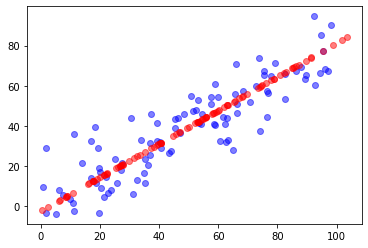

In [49]:
plt.scatter(X[:,0],X[:,1],color='b',alpha=0.5)
plt.scatter(X_restore[:,0],X_restore[:,1],color='r',alpha=0.5)
plt.show()

<font color=black size=5 face=雅黑>**scikit-learn中的PCA(实例：手写识别）**</font>

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [110]:
digits=datasets.load_digits()
x= digits.data
y= digits.target

In [83]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [84]:
X_train.shape

(1437, 64)

In [54]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()

knn_clf.fit(X_train,y_train)

CPU times: user 12.9 ms, sys: 6.39 ms, total: 19.3 ms
Wall time: 33.5 ms


KNeighborsClassifier()

In [55]:
knn_clf.score(X_test,y_test)

0.9888888888888889

In [99]:
#使用PCA降低维

from sklearn.decomposition import PCA

#从64纬降纬到2

pca=PCA(n_components=2)
pca.fit(X_train)
X_train_reduction=pca.transform(X_train)
X_test_reduction=pca.transform(X_test)

In [100]:
%%time

knn_clf=KNeighborsClassifier()

knn_clf.fit(X_train_reduction,y_train)

CPU times: user 1.38 ms, sys: 735 µs, total: 2.11 ms
Wall time: 1.55 ms


KNeighborsClassifier()

In [101]:
knn_clf.score(X_test_reduction,y_test)

0.6055555555555555

In [102]:
X_reduction.shape

(100, 1)

In [59]:
#可以用来解释选择降成多少维度

pca.explained_variance_ratio_

array([0.1450646 , 0.13714246])

In [60]:
pca=PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45064600e-01, 1.37142456e-01, 1.19680004e-01, 8.43768923e-02,
       5.87005941e-02, 5.01797333e-02, 4.34065700e-02, 3.61375740e-02,
       3.39661991e-02, 3.00599249e-02, 2.38906921e-02, 2.29417581e-02,
       1.81335935e-02, 1.78403959e-02, 1.47411385e-02, 1.41290045e-02,
       1.29333094e-02, 1.25283166e-02, 1.01123057e-02, 9.08986879e-03,
       8.98365069e-03, 7.72299807e-03, 7.62541166e-03, 7.09954951e-03,
       6.96433125e-03, 5.84665284e-03, 5.77225779e-03, 5.07732970e-03,
       4.84364707e-03, 4.34595748e-03, 3.73352381e-03, 3.57655938e-03,
       3.30727680e-03, 3.18129431e-03, 3.06969704e-03, 2.89170006e-03,
       2.51205204e-03, 2.27743660e-03, 2.22760483e-03, 2.00065017e-03,
       1.89529684e-03, 1.56877138e-03, 1.42740894e-03, 1.39115781e-03,
       1.20896097e-03, 1.10149976e-03, 9.81702199e-04, 8.82376601e-04,
       5.69898729e-04, 4.10322729e-04, 2.32125043e-04, 8.49807543e-05,
       5.37426557e-05, 5.27990816e-05, 1.03398093e-05, 6.20749843e-06,
      

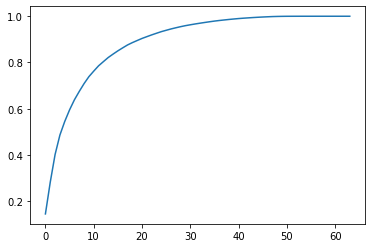

In [62]:
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1])for i in range(X_train.shape[1])])
plt.show()    

In [85]:
from sklearn.decomposition import PCA
#PCA(0.95)指定要解释原来的数据95%以上的方差

pca=PCA(0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [86]:
pca.n_components_

28

In [87]:
X_train_reduction=pca.transform(X_train)
X_test_reduction=pca.transform(X_test)

In [90]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()

knn_clf.fit(X_train_reduction,y_train)

CPU times: user 2.3 ms, sys: 1.26 ms, total: 3.56 ms
Wall time: 2.56 ms


KNeighborsClassifier()

In [91]:
knn_clf.score(X_test_reduction,y_test)

0.9833333333333333

In [111]:
x.shape

(1797, 64)

In [113]:
pca=PCA(n_components=2)
pca.fit(x)
X_reduction=pca.transform(x)

In [114]:
X_reduction.shape

(1797, 2)

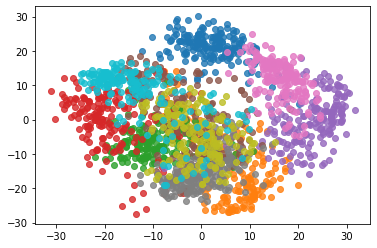

In [127]:
for i in range(64):
    plt.scatter(X_reduction[y==i,0],X_reduction[y==i,1],alpha=0.8)
plt.show()